# Access and plot AROME Arctic weather forecasts

In [1]:
# Activate the following in colab : 
#!pip3 install netCDF4
#!apt install proj-bin libproj-dev libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr

##### Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. Note, at this point only metadata is retrieved

In [2]:
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_full_2_5km_latest.nc'
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/latest/arome_arctic_lagged_12_h_latest_2_5km_latest.nc'
dataset = xr.open_dataset(url)

### Metadata

In [3]:
dataset

<xarray.Dataset>
Dimensions:                    (time: 58, ensemble_member: 4, pressure: 2,
                                height_above_msl: 1, height0: 1, height1: 1,
                                height2: 1, x: 739, y: 949)
Coordinates:
  * time                       (time) datetime64[ns] 2023-08-31T15:00:00 ... ...
  * ensemble_member            (ensemble_member) int16 0 1 2 3
  * pressure                   (pressure) float32 850.0 925.0
  * height_above_msl           (height_above_msl) float32 0.0
  * height0                    (height0) float32 2.0
  * height1                    (height1) float32 0.0
  * height2                    (height2) float32 10.0
  * x                          (x) float32 2.786e+05 2.811e+05 ... 2.124e+06
  * y                          (y) float32 -8.98e+05 -8.955e+05 ... 1.472e+06
    longitude                  (y, x) float64 ...
    latitude                   (y, x) float64 ...
Data variables: (12/15)
    forecast_reference_time    datetime64[ns] ...
    projection_lambert         int32 ...
    x_wind_pl                  (time, pressure, ensemble_member, y, x) float32 ...
    y_wind_pl                  (time, pressure, ensemble_member, y, x) float32 ...
    air_temperature_pl         (time, pressure, ensemble_member, y, x) float32 ...
    air_temperature_2m         (time, height0, ensemble_member, y, x) float32 ...
    ...                         ...
    cloud_area_fraction        (time, height1, ensemble_member, y, x) float32 ...
    air_pressure_at_sea_level  (time, height_above_msl, ensemble_member, y, x) float32 ...
    precipitation_amount_acc   (time, height1, ensemble_member, y, x) float32 ...
    snowfall_amount_acc        (time, height1, ensemble_member, y, x) float32 ...
    wind_speed_of_gust         (time, height2, ensemble_member, y, x) float32 ...
    fog_area_fraction          (time, height1, ensemble_member, y, x) float32 ...
Attributes: (12/23)
    Conventions:                     CF-1.6, ACDD
    institution:                     Norwegian Meteorological Institute, MET ...
    institution_short_name:          NO/MET
    creator_url:                     met.no
    source:                          AROME-Arctic 2.5km
    title:                           AROME_Arctic 2.5km
    ...                              ...
    dataset_production_status:       Active
    iso_topic_category:              climatologyMeteorologyAtmosphere
    spatial_representation:          grid
    naming_authority:                no.met
    history:                         2023-08-31T17:27:12 creation by fimex
    DODS_EXTRA.Unlimited_Dimension:  time

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [4]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [5]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,78.24,15.46) # For example for Longyearbyen

In [6]:
t2m_point = dataset.air_temperature_2m[:,0,0,ix,jx]

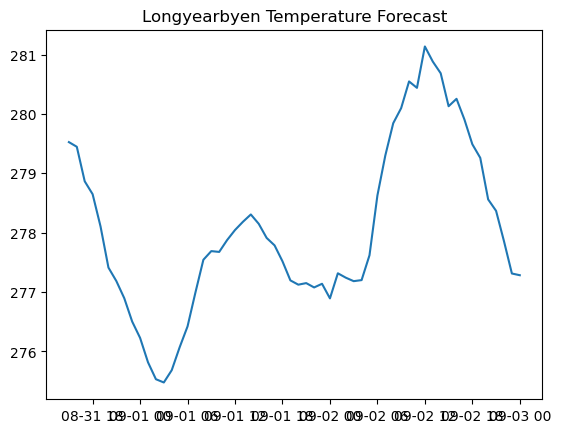

In [7]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Longyearbyen Temperature Forecast")
plt.show()

### Plot one forecast on a map

C:\Users\mattd\AppData\Local\Temp\ipykernel_25596\2730466245.py:19: UserWarning: The following kwargs were not used by contour: 'extemd'
  cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')


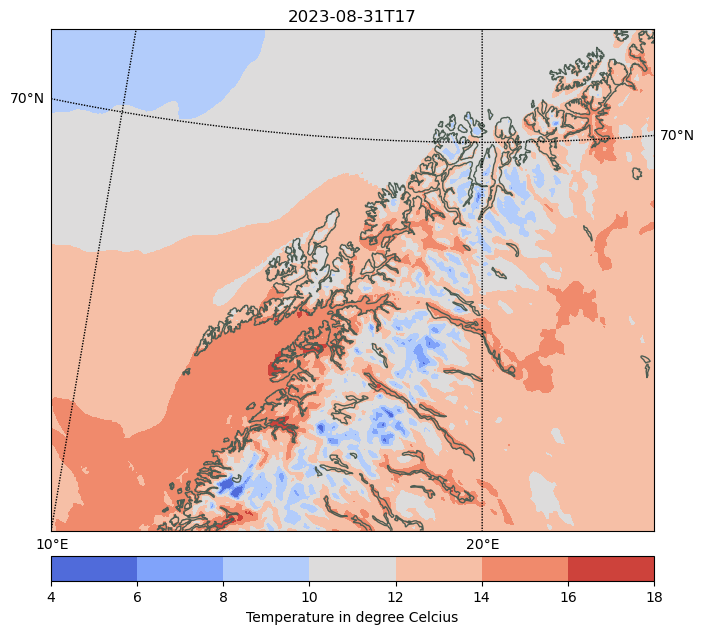

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep = 2
fig = plt.figure(figsize=(14.4,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(121)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='h', 
            llcrnrlat= 66.0, urcrnrlat=71.0, llcrnrlon=10.0, urcrnrlon=25.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[timestep],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius') 